# Лабораторная работа № 5

## Задание 1

In [94]:
import sys
!{sys.executable} -m pip install seaborn
!{sys.executable} -m pip install scipy   statsmodels
!{sys.executable} -m pip install statsmodels 

1) Установим необходимые библиотеки и вызовем их:

In [95]:
import math
import statistics
import numpy as np
import scipy.stats
import pandas as pd

2) Создадим списки x и x_with_nan:

In [96]:
x = [10.0, 2, 2.5, 5, 26.0]
x_with_nan = [10.0, 2, 2.5, math.nan, 5, 26.0]
print(f'Вывод исходных данных, которые содержатся в x:{x}')
print(f'Вывод исходных данных, которые содержатся в x_with_nan:{x_with_nan}')

Вывод исходных данных, которые содержатся в x:[10.0, 2, 2.5, 5, 26.0]
Вывод исходных данных, которые содержатся в x_with_nan:[10.0, 2, 2.5, nan, 5, 26.0]


3) Создадим объекты np.ndarray и pd.Series, соответствующие x и
x_with_nan:

In [97]:
y, y_with_nan = np.array(x), np.array(x_with_nan)
z, z_with_nan = pd.Series(x), pd.Series(x_with_nan)
print(f'Вывод данных, которые содержатся в y и y_with_nan:{y}, {y_with_nan}')
print(f'Вывод данных, которые содержатся в z и в z_with_nan: {z}, {z_with_nan}')

Вывод данных, которые содержатся в y и y_with_nan:[10.   2.   2.5  5.  26. ], [10.   2.   2.5  nan  5.  26. ]
Вывод данных, которые содержатся в z и в z_with_nan: 0    10.0
1     2.0
2     2.5
3     5.0
4    26.0
dtype: float64, 0    10.0
1     2.0
2     2.5
3     NaN
4     5.0
5    26.0
dtype: float64


4) После формирования исходных данных, приступаем к расчету
центральной метрики, а именно среднего значения:

In [98]:
#Расчет средних значений
mean_1 = sum(x) / len(x)
print(f'Расчет среднего значения, используя sum и len: {mean_1}')
mean_2 = statistics.mean(x)
print(f'Расчет среднего значения, используя встроенные функции статистики Python (statistics.mean(x)): {mean_2}')
mean_3 = statistics.mean(x)
print(f'Расчет среднего значения, используя встроенные функции статистики Python (statistics.fmean(x)): {mean_3}')
mean_4 = statistics.mean(x_with_nan)
print(f'Расчет среднего значения, который содержит значения nan, используя встроенные функции статистики Python (statistics.mean(x)): {mean_4}')
mean_5 = np.mean(y)
print(f'Расчет среднего значения, используя NumPy: {mean_5}')
np.nanmean(y_with_nan)
print(f'Расчет среднего значения с помощью NumPy, игнорируя nan: {np.nanmean(y_with_nan)}')
mean_6 = z.mean()
print(f'Расчет среднего значения объекта pd.Series: {mean_6}')

Расчет среднего значения, используя sum и len: 9.1
Расчет среднего значения, используя встроенные функции статистики Python (statistics.mean(x)): 9.1
Расчет среднего значения, используя встроенные функции статистики Python (statistics.fmean(x)): 9.1
Расчет среднего значения, который содержит значения nan, используя встроенные функции статистики Python (statistics.mean(x)): nan
Расчет среднего значения, используя NumPy: 9.1
Расчет среднего значения с помощью NumPy, игнорируя nan: 9.1
Расчет среднего значения объекта pd.Series: 9.1


5) Рассчитаем средневзвешенное значение. Средневзвешенное или также
называемое средневзвешенным арифметическим или средневзвешенным
значением, является обобщением среднего арифметического, которое позволяет
вам определить относительный вклад каждой точки данных в результат:

In [99]:
#Расчет средневзвешанных значений
x = [6.0, 1, 2.5, 6, 25.0]
w = [0.1, 0.2, 0.3, 0.25, 0.15]
wmean = sum(w[i] * x[i] for i in range(len(x))) / sum(w)
print(f'Расчет средневзвешанного с помощью range: {wmean}')
wmean2 = sum(x_ * w_ for (x_, w_) in zip(x, w)) / sum(w)
print(f'Расчет средневзвешанного с помощью zip: {wmean2}')
y, z, w = np.array(x), pd.Series(x), np.array(w)
wmean3= np.average(y, weights=w)
print(f'Расчет средневзвешанного с помощью np.average для массивово NumPy или серии Pandas: {wmean3}')
o = (w * y).sum() / w.sum()
print(f'Расчет средневзвешанного с помощью поэлементного умножения w * y: {o}')
w = np.array([0.1, 0.2, 0.3, 0.0, 0.2, 0.1])
print(f'Расчет средневзвешанного для набора, который содержит nan: {(w * y_with_nan).sum() / w.sum()}')

Расчет средневзвешанного с помощью range: 6.8
Расчет средневзвешанного с помощью zip: 6.8
Расчет средневзвешанного с помощью np.average для массивово NumPy или серии Pandas: 6.8
Расчет средневзвешанного с помощью поэлементного умножения w * y: 6.8
Расчет средневзвешанного для набора, который содержит nan: nan


6) Рассчитаем гармоническое среднее, что есть обратная величина от
среднего значения обратных величин всех элементов в наборе данных:

In [100]:
#Гармоническое среднее
hmean = len(x) / sum(1 / item for item in x)
print(f'Расчет гармонического среднего: {hmean}')
hmean2 = statistics.harmonic_mean(x)
print(f'Расчет гармонического среднего с помощью statistics.harmonic_mean(): {hmean2}')
statistics.harmonic_mean(x_with_nan)
print(f'Расчет гармонического среднего, где есть nan: {statistics.harmonic_mean(x_with_nan)}')
statistics.harmonic_mean([1, 0, 2])
print(f'Расчет гармонического среднего, где есть 0: {statistics.harmonic_mean([1, 0, 2])}')
scipy.stats.hmean(y)
print(f'Расчет гармонического среднего с помощьюscipy.stats.hmean(): {scipy.stats.hmean(y)}')

Расчет гармонического среднего: 2.8195488721804507
Расчет гармонического среднего с помощью statistics.harmonic_mean(): 2.819548872180451
Расчет гармонического среднего, где есть nan: nan
Расчет гармонического среднего, где есть 0: 0
Расчет гармонического среднего с помощьюscipy.stats.hmean(): 2.8195488721804507


7) Рассчитаем среднее геометрическое:

In [101]:
#Среднее геометрическое
gmean = 1
for item in x:
    gmean *= item
    gmean **= 1 / len(x)
print(f'Вычисление геометрического среднего: {gmean}')
gmean2 = statistics.geometric_mean(x)
print(f'Вычисление геометрического среднего с помощью statistics.geometric_mean(): {gmean2}')
gmean3 = statistics.geometric_mean(x_with_nan)
print(f'Вычисление геометрического среднего где есть nan: {gmean3}')
scipy.stats.gmean(y)
print(f'Вычисление геометрического среднего с помощью scipy.stats.gmean(): {scipy.stats.gmean(y)}')

Вычисление геометрического среднего: 2.0613255209172676
Вычисление геометрического среднего с помощью statistics.geometric_mean(): 4.682054920046206
Вычисление геометрического среднего где есть nan: nan
Вычисление геометрического среднего с помощью scipy.stats.gmean(): 4.682054920046206


8) Медиана – это средний элемент отсортированного набора данных.
Расчет медианы представлен в следующем программном коде:

In [102]:
n = len(x)
if n % 2:
    median_ = sorted(x)[round(0.5*(n-1))]
else:
    x_ord, index = sorted(x), round(0.5 * n)
    median_ = 0.5 * (x_ord[index-1] + x_ord[index])
print(f'Расчет медианы: {median_}')
median_2 = statistics.median(x)
print(f'Расчет медианы с помощью statistics.median(): {median_2}')
statistics.median_low(x[:-1])
print(f'Расчет медианы с помощью statistics.median_low: {statistics.median_low(x[:-1])}')
statistics.median_high(x[:-1])
print(f'Расчет медианы с помощью statistics.median_high {statistics.median_high(x[:-1])}')
median_2 = np.median(y)
print(f'Расчет медианы с помощью np.median: {median_2}')

Расчет медианы: 6.0
Расчет медианы с помощью statistics.median(): 6.0
Расчет медианы с помощью statistics.median_low: 2.5
Расчет медианы с помощью statistics.median_high 6.0
Расчет медианы с помощью np.median: 6.0


9) Мода – это значение в наборе данных, которое встречается чаще всего.
Если такого значения не существует, набор является мультимодальным,
поскольку он имеет несколько модальных значений. Расчет моды представлен в
программном коде:

In [103]:
u = [2, 3, 2, 8, 12]
mode_ = max((u.count(item), item) for item in set(u))[1]
print(f'Вычисление моды: {mode_}')
mode_2 = statistics.mode(u)
print(f'Вычисление моды с помощью statistics.mode(): {mode_2}')
mode_3 = statistics.multimode(u)
print(f'Вычисление моды с помощью statistics.multimode(): {mode_3}')
mode_4 = scipy.stats.mode(u)
print(f'Вычисление моды с помощью scipy.stats.mode(): {mode_4}')

Вычисление моды: 2
Вычисление моды с помощью statistics.mode(): 2
Вычисление моды с помощью statistics.multimode(): [2]
Вычисление моды с помощью scipy.stats.mode(): ModeResult(mode=array([2]), count=array([2]))


C:\Users\artem\AppData\Local\Temp\ipykernel_14484\1410363380.py:8: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_4 = scipy.stats.mode(u)


10) Центральных метрик недостаточно для описания данных. Практически
всегда необходимы метрики оценки вариативности данных, которые
количественно определяют разброс точек данных. И первым показателем
метрики оценки вариативности данных является дисперсия. Дисперсия
количественно определяет разброс данных и численно показывает, как далеко
расположены точки данных от среднего значения.
Расчет дисперсии:

In [104]:
n = len(x)
mean = sum(x) / n
var_ = sum((item - mean)**2 for item in x) / (n - 1)
print(f'Оценка дисперсии на чистом Python: {var_}')
var_1= statistics.variance(x)
print(f'Оценка дисперсии с помощью statistics.variance(): {var_1}')
statistics.variance(x_with_nan)
print(f'Оценка дисперсии с помощью statistics.variance(), где есть nan: {statistics.variance(x_with_nan)}')
var_2 = np.var(y, ddof=1)
print(f'Оценка дисперсии, используя NumPy с помощью np.var(): {var_2}')
var_3 = y.var(ddof=1)
print(f'Оценка дисперсии, используя NumPy с помощью метода .var(): {var_3}')

Оценка дисперсии на чистом Python: 94.04999999999998
Оценка дисперсии с помощью statistics.variance(): 94.05


ValueError: cannot convert NaN to integer ratio

11) Рассчитаем среднеквадратичное отклонение. Стандартное отклонение
выборки является еще одним показателем разброса данных. Он связан с
оценкой дисперсии, поскольку стандартное отклонение есть положительным
квадратный корень из оценки дисперсии. Стандартное отклонение часто более
удобно, чем дисперсия, потому что имеет ту же размерность, что и данные.
Расчет среднеквадратичного отклонения:

In [105]:
#Среднеквадратичное отклонение
std_ = var_ ** 0.5
print(f'Расчет среднеквадратичного отклонения на чистом Python: {std_}')
std_2 = statistics.stdev(x)
print(f'Расчет среднеквадратичного отклонения с помощью statistics.stdev(): {std_2}')
np.std(y, ddof=1)
print(f'Расчет среднеквадратичного отклонения с помощью NumPy: {np.std(y, ddof=1)}')

Расчет среднеквадратичного отклонения на чистом Python: 9.697937925146768
Расчет среднеквадратичного отклонения с помощью statistics.stdev(): 9.697937925146768
Расчет среднеквадратичного отклонения с помощью NumPy: 9.697937925146768


12) Найдем смещение:

In [106]:
#Смещение
x = [8.0, 1, 2.5, 4, 28.0]
n = len(x)
mean_ = sum(x) / n
var_ = sum((item - mean_)**2 for item in x) / (n - 1)
std_ = var_ ** 0.5
skew_ = (sum((item - mean_)**3 for item in x) * n / ((n - 1) * (n - 2) * std_**3))
print(f'Расчет смещения на чистом Python: {skew_}')
z, z_with_nan = pd.Series(x), pd.Series(x_with_nan)
print(f'Расчет смещения с помощью Pandas: {z.skew()}')

Расчет смещения на чистом Python: 1.9470432273905929
Расчет смещения с помощью Pandas: 1.9470432273905924


13) Процентиль – такой элемент в наборе данных, что p элементов в этом
наборе данных меньше или равно его значению. Кроме того, (100 – p)
элементов больше или равно этому значению. Если в наборе данных есть два
таких элемента, то процентиль является их средним арифметическим.
Расчитаем процентиль:

In [107]:
#Процентили
x = [-5.0, -1.1, 0.1, 2.0, 8.0, 12.8, 21.0, 25.8, 41.0]
print(f'Расчет процентилей с помощью statistics.quantiles(): {statistics.quantiles(x, n=2)}')
statistics.quantiles(x, n=4, method='inclusive')
print(f"Расчет процентилей с помощью statistics.quantiles(): {statistics.quantiles(x, n=4, method='inclusive')}")
y = np.array(x)
np.percentile(y, 5)
print(f'Нахождение 5 процентиля : {np.percentile(y, 5)}')
np.percentile(y, 95)
print(f'Нахождение 95 процентиля : {np.percentile(y, 95)}')
z, z_with_nan = pd.Series(y), pd.Series(y_with_nan)
z.quantile(0.05)
print(f'Нахождение процентиля используя метод .quantile():{z.quantile(0.05)}')

Расчет процентилей с помощью statistics.quantiles(): [8.0]
Расчет процентилей с помощью statistics.quantiles(): [0.1, 8.0, 21.0]
Нахождение 5 процентиля : -3.44
Нахождение 95 процентиля : 34.919999999999995
Нахождение процентиля используя метод .quantile():-3.44


14) Диапазон данных – это разница между максимальным и
минимальным элементом в наборе данных. Эти показатели найдем с
использованием функции np.ptp():

In [108]:
#Диапазон
np.ptp(y)
np.ptp(z)
np.ptp(y_with_nan)
np.ptp(z_with_nan)
print(f'Нахождение диапазона с помощью функции np.ptp(): {np.ptp(y),np.ptp(z),np.ptp(y_with_nan),np.ptp(z_with_nan)}')

Нахождение диапазона с помощью функции np.ptp(): (46.0, 46.0, nan, nan)


15) сводка описательной статистики:

In [109]:
#Сводка описательной статистики
result = scipy.stats.describe(y, ddof=1, bias=False)
print(f'Сводка описательной статистики с помощью scipy.stats.describe(): {result}')
result2 = z.describe()
print(f'Сводка описательной статистики с помощью метода .describe() в Pandas: {result2}')

Сводка описательной статистики с помощью scipy.stats.describe(): DescribeResult(nobs=9, minmax=(-5.0, 41.0), mean=11.622222222222222, variance=228.75194444444446, skewness=0.9249043136685094, kurtosis=0.14770623629658886)
Сводка описательной статистики с помощью метода .describe() в Pandas: count     9.000000
mean     11.622222
std      15.124548
min      -5.000000
25%       0.100000
50%       8.000000
75%      21.000000
max      41.000000
dtype: float64


## Задание 2

In [110]:
#import pandas as pd
#import numpy as np
import matplotlib.pyplot as plt
#from sklearn.preprocessing import StandardScaler,OneHotEncoder
#from sklearn.model_selection import train_test_split
import seaborn as sb
from scipy.stats import norm
from scipy import stats
from pandas import DataFrame
%matplotlib inline


#19house_train.csv

 ### 1) Данные

- Сколько данных в датасете?

In [111]:
pd.set_option('display.max_columns', 100)
df = pd.read_csv('house_train.csv')
df.drop('Id', axis=1, inplace=True)
df.shape[0]

1460

- Сколько параметров? Выведите список всех параметров.

In [112]:
print("Number of parametrs: ", df.columns.size, "\n")
df.info(memory_usage='deep')



Number of parametrs:  80 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-n

In [113]:
# ИЛИ

In [114]:
df.all()

MSSubClass       True
MSZoning         True
LotFrontage      True
LotArea          True
Street           True
                 ... 
MoSold           True
YrSold           True
SaleType         True
SaleCondition    True
SalePrice        True
Length: 80, dtype: bool

-Есть ли категориальные признаки? Перечислите / выведите их.

In [115]:
df.describe(include=['O']).T

,count,unique,top,freq
MSZoning,1460,5,RL,1151
Street,1460,2,Pave,1454
Alley,91,2,Grvl,50
LotShape,1460,4,Reg,925
LandContour,1460,4,Lvl,1311
Utilities,1460,2,AllPub,1459
LotConfig,1460,5,Inside,1052
LandSlope,1460,3,Gtl,1382
Neighborhood,1460,25,NAmes,225
Condition1,1460,9,Norm,1260


- Выведите первые пять строчек DataFrame.

In [116]:
df[0:5]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Или

In [117]:
df.head(5)


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


- А что будет, если выполнить такую инструкцию:


In [118]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0
BsmtFinSF2,1460.0,46.549315,161.319273,0.0,0.00,0.0,0.00,1474.0


Получим значения статистических параметров каждого столбца

In [119]:
df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

а) чему равно среднее значение?

In [120]:
df['SalePrice'].describe()['mean']

180921.19589041095

б) чему равно стандартное отклонение?

In [121]:
df['SalePrice'].describe()['std']

79442.50288288662

3) Проверьте, есть ли пропуски и повторы в данных.

In [122]:
print(df.isna().sum())

MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 80, dtype: int64


Проверка на наличие повторяющихся строк

In [123]:
print(df.duplicated().sum())

0


4) Получите список названий столбцов, запросив атрибут columns.

In [124]:
print(df.columns)


Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

5) Анализ пропущенных значений и удаление

а) Выясним, в каких параметрах отсутствует статистика (данные):

In [125]:
na_count = df.isnull().sum().sort_values(ascending=False)
#Вычисляем, сколько пропущенных значений в параметрах 3
na_rate = na_count / len(df) # Вычисляем частоту или
#вероятность, с которой пропущенное значение встречается в
#каждом параметре. Если вероятность большая (>0.5), столбцыпараметры можно смело удалять).

# формируем массив для печати
na_data = pd.concat([na_count,
na_rate],axis=1,keys=['count','ratio'])
print(na_data)

             count     ratio
PoolQC        1453  0.995205
MiscFeature   1406  0.963014
Alley         1369  0.937671
Fence         1179  0.807534
FireplaceQu    690  0.472603
...            ...       ...
Heating          0  0.000000
HeatingQC        0  0.000000
MSZoning         0  0.000000
1stFlrSF         0  0.000000
SalePrice        0  0.000000

[80 rows x 2 columns]


In [126]:
df_new = df.drop(['PoolQC', 'MiscFeature', 'Alley'], axis=1)
print(df_new.isna().sum())
df_new.shape

MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 77, dtype: int64


(1460, 77)

In [127]:
df_new = df_new.drop(['GarageQual', 'GarageCond', 'Fence'], axis=1)
print(df_new.isna().sum())

MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 74, dtype: int64


In [128]:
df_new=df_new.drop(['MasVnrArea', 'MasVnrType'], axis=1)
print(df_new.isna().sum())

MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 72, dtype: int64


6. Однофакторный анализ данных

In [129]:
df = df_new
df.shape

(1460, 72)

In [130]:
df = pd.read_csv('house_train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


6.1. Гистограмма

C:\Users\artem\AppData\Local\Temp\ipykernel_14484\992221721.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(df['SalePrice'])


<AxesSubplot: xlabel='SalePrice', ylabel='Density'>

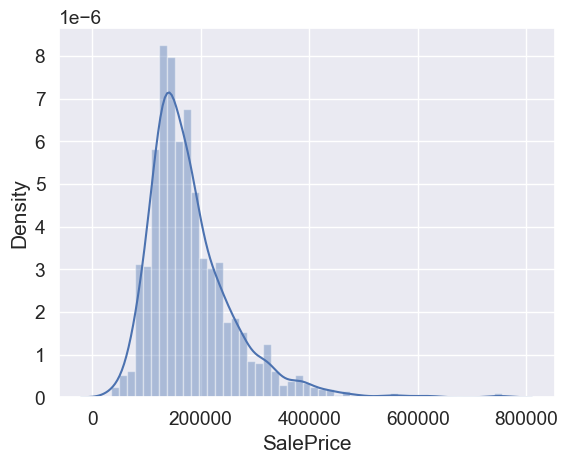

In [131]:
sb.distplot(df['SalePrice'])

<AxesSubplot: xlabel='SalePrice', ylabel='Count'>

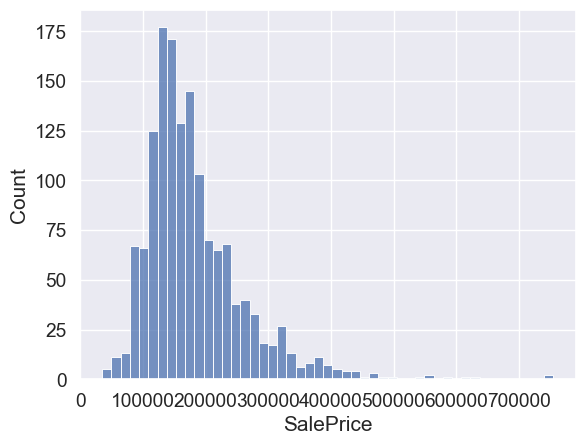

In [132]:
sb.histplot(df['SalePrice'])

По рисунку: цена дома подчиняется нормальному распределению?

Да

In [153]:
print("Skewness: %f" % df['SalePrice'].skew()) # ассимитрия("Перекос")
print("Kurtosis: %f" % df['SalePrice'].kurt()) # эксцесс (показатель остроты пика графика распределения.)

Skewness: 1.882876
Kurtosis: 6.536282


Задание: Постройте гистограмму параметра SalePrice всех домов c заголовком
'Histogram of Sale Price', заголовок оси х – 'price', заголовок оси у
– 'count'.

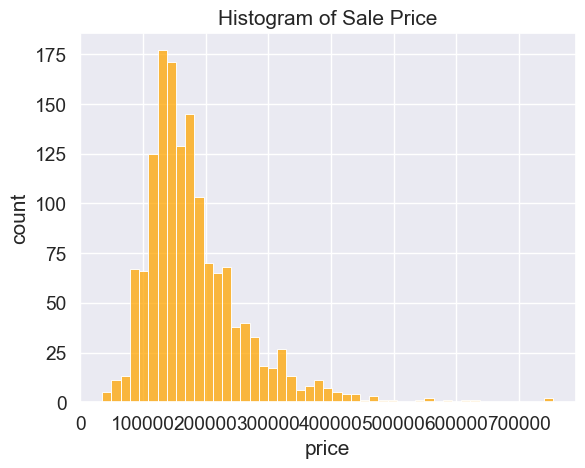

In [154]:
ax = sb.histplot(df['SalePrice'], color='orange')
ax.set(xlabel='price', ylabel='count', title='Histogram of Sale Price')
ax.grid(1)
plt.show()

6.2. Boxplot
Построить коробочную диаграмму (ящик с усами) признака SalePrice всех
домов в данных. Боксплоты не показывают форму распределения, но они могут
дать нам лучшее представление о центре и распространении распределения, а 
также о любых возможных выбросах, которые могут существовать. Боксплоты и
гистограммы часто дополняют друг друга и помогают нам лучше понять данные.
Заголовок рисунка – title='Box plot of SalePrice'. Результат:

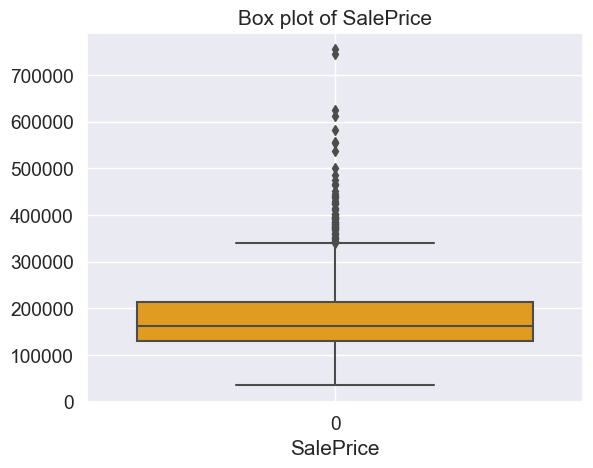

In [155]:
ax = sb.boxplot(df['SalePrice'], color='orange')
ax.set(xlabel='SalePrice', title='Box plot of SalePrice')
ax.grid(1)
plt.show()

6.3. Гистограммы и Боксплоты по группам

Для построения Boxplot и гистограмм цены дома сгруппируем данные с
кондиционером (name = 'With air conditioning') и без кондиционера
(name = 'No air conditioning'); для Boxplot title = "Boxplot of
Sale Price by air conditioning"

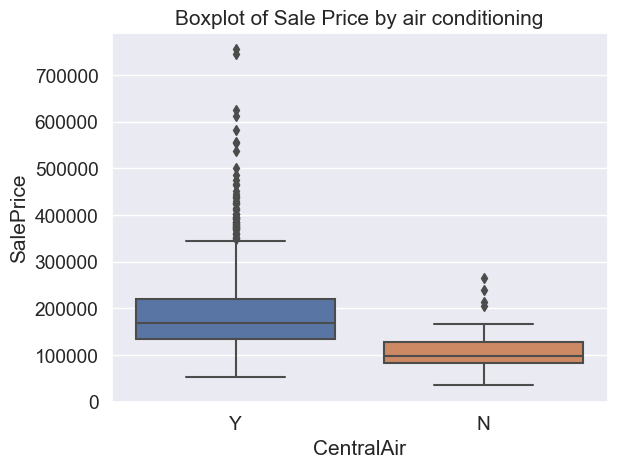

In [156]:

ax = sb.boxplot(y='SalePrice',  x='CentralAir',  data=df)
ax.set(title='Boxplot of Sale Price by air conditioning')
plt.show()

б) Для гистограммы – заголовок title='Histogram of House Sale Price for both with and with no Central air conditioning'

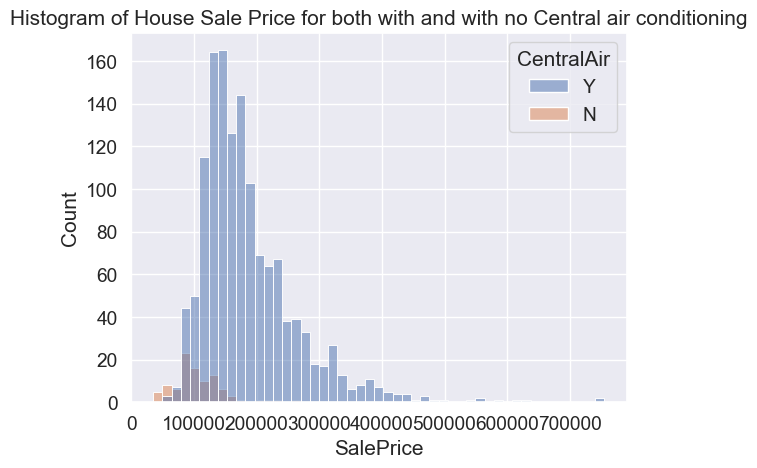

In [157]:
ax = sb.histplot(x='SalePrice', hue='CentralAir', data=df)
ax.set(title='Histogram of House Sale Price for both with and with no Central air conditioning')
#ax.legend(x, hue)
plt.show()

в) Выведем описательную статистику 'CentralAir' и 'SalePrice' с
помощью инструкции:


In [158]:
df.groupby('CentralAir')['SalePrice'].describe()

,count,mean,std,min,25%,50%,75%,max
CentralAir,,,,,,,,
N,95.0,105264.073684,40671.273961,34900.0,82000.0,98000.0,128500.0,265979.0
Y,1365.0,186186.709890,78805.206820,52000.0,134800.0,168000.0,219210.0,755000.0


г ) Постройте Boxplot и гистограмму цены продажи домов (параметр
'SalePrice'), сгруппированные по размеру гаража (параметр
'GarageCars'): title = "Boxplot of Sale Price by garage
size".
Используйте при группировке name = 'no garage' и name = '1-
car garage' – если гараж для одной машины; name = '2-car garage' –
если гараж для двух машин; name = '3-car garage' – если гараж для трех
машин; name = '4-car garage' – если гараж для четырех машин.

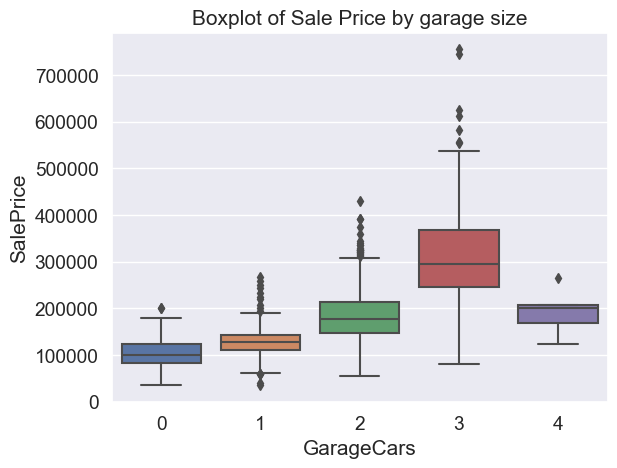

In [159]:
ax = sb.boxplot(y='SalePrice', x='GarageCars', data=df)
ax.set(title='Boxplot of Sale Price by garage size')
plt.show()

6.4. Таблица частот

а) Таблица частот размеров гаража

In [160]:
x = df.GarageCars.value_counts()
x/x.sum()

2    0.564384
1    0.252740
3    0.123973
0    0.055479
4    0.003425
Name: GarageCars, dtype: float64

Наиболее распространены гаражи на 2 места

б) Таблица частот центрального кондиционирования


In [161]:
x = df.CentralAir.value_counts()
x/x.sum()

Y    0.934932
N    0.065068
Name: CentralAir, dtype: float64

6.5. Числовые характеристики параметров


– Рассчитайте долю домов с продажной ценой между 25-м процентилем (129975)
и 75-м процентилем (214000)

In [162]:
print('The proportion of the houses with prices between 25th percentile and 75th percentile: ',
np.mean((df.SalePrice >= 129975) & (df.SalePrice <= 214000)))

The proportion of the houses with prices between 25th percentile and 75th percentile:  0.5020547945205479


– Рассчитайте долю домов с общей площадью в квадратных футах от 25-го
процентиля (795,75) до 75-го процентиля (1298,25).

In [163]:
print('The proportion of house with total square feet of basement area between 25th percentile and 75th percentile:', 
np.mean((df.TotalBsmtSF >= 795.75) & (df.TotalBsmtSF <= 1298.25)))

The proportion of house with total square feet of basement area between 25th percentile and 75th percentile: 0.5


Наконец, мы рассчитаем долю домов на основе любых условий.
Поскольку некоторые дома соответствуют обоим критериям, приведенная ниже пропорция
меньше суммы двух пропорций, рассчитанных выше.

In [164]:
a = (df.SalePrice >= 129975) & (df.SalePrice <= 214000)
b = (df.TotalBsmtSF >= 795.75) & (df.TotalBsmtSF <= 1298.25)
print(np.mean(a | b))

0.7143835616438357


Рассчитать цену продажи интерквартильного размаха IQR для домов без кондиционера.
Англоязычная аббревиатура IQR – интерквартильный размах – число,
которое показывает разброс средней половины (т.е. средние 50%)
набора данных и помогает определить выбросы. IQR – это разница между 
третьим квартилем (Q3) и первым(Q1).

In [165]:

q75, q25 = np.percentile(df.loc[df['CentralAir']=='N']['SalePrice'], [75,25])
iqr = q75 - q25
print('Sale price IQR for houses with no air conditioning:', iqr)

Sale price IQR for houses with no air conditioning: 46500.0


Рассчитать цену продажи IQR для домов с кондиционером

In [166]:
q75, q25 = np.percentile(df.loc[df['CentralAir']=='Y']['SalePrice'], [75,25])
iqr = q75 - q25
print('Sale price IQR for houses with air conditioning: ', iqr)

Sale price IQR for houses with air conditioning:  84410.0


6.6. Стратификация

– Создадим новый столбец HouseAge (YearBuilt), затем разделим данные на части
HouseAge и построим параллельные боксовые диаграммы цены продажи внутри
каждой страты.

<AxesSubplot: xlabel='AgeGrp', ylabel='SalePrice'>

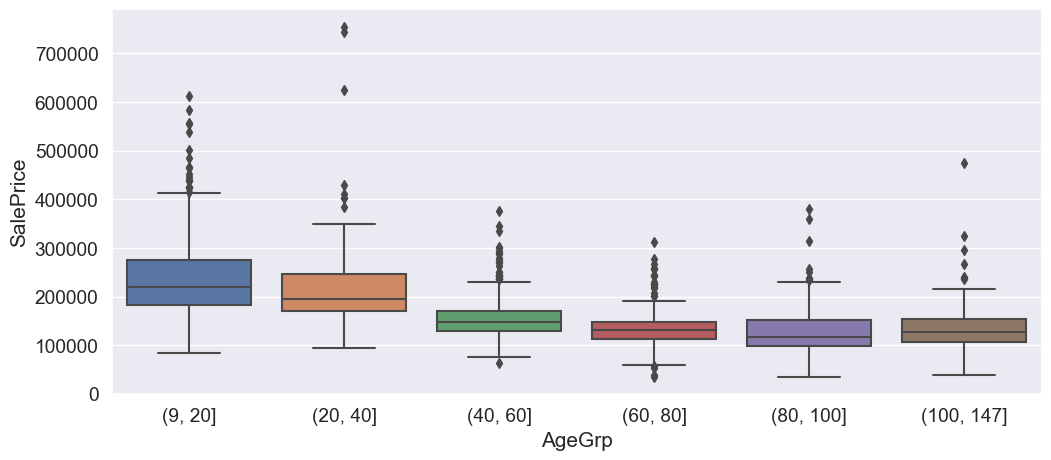

In [167]:
df['HouseAge'] = 2019 - df['YearBuilt']
df["AgeGrp"] = pd.cut(df.HouseAge, [9, 20, 40, 60, 80, 100, 147]) # Create age strata based on these cut points
plt.figure(figsize=(12, 5))
sb.boxplot(x="AgeGrp", y="SalePrice", data=df)

Вопрос: Сравните возраст дома и среднюю цену на него. Какая наблюдается
закономерность?

Наблюдается прямая обратная зависимость. Чем моложе дом - тем больше цена

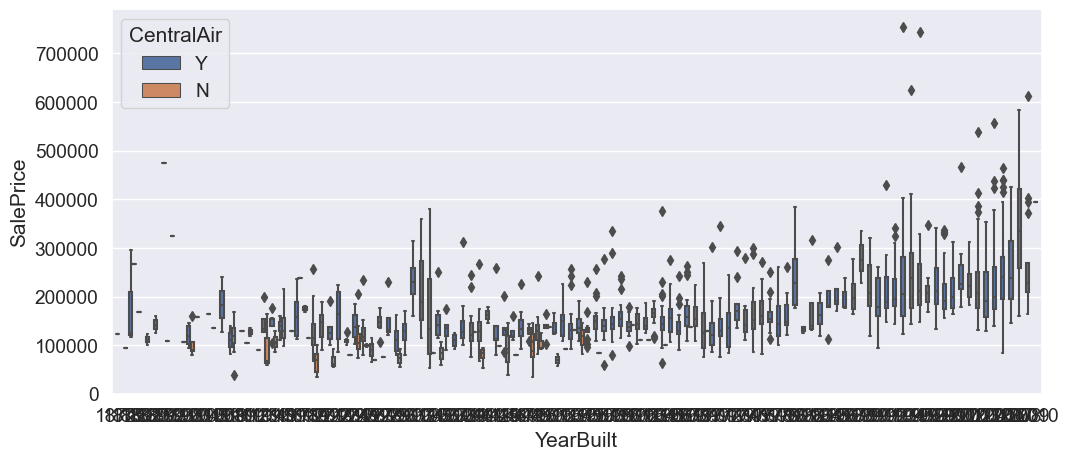

In [168]:
plt.figure(figsize=(12, 5))
sb.boxplot(x="YearBuilt", y="SalePrice", hue="CentralAir", data=df)
plt.show()


сделайте вывод: какие по возрасту дома более оснащены кондиционерами.
Более новые.

Теперь мы сгруппируем сначала по кондиционированию воздуха, а затем в
группе кондиционирования по возрастным группам. Каждый подход
подчеркивает различные аспекты данных

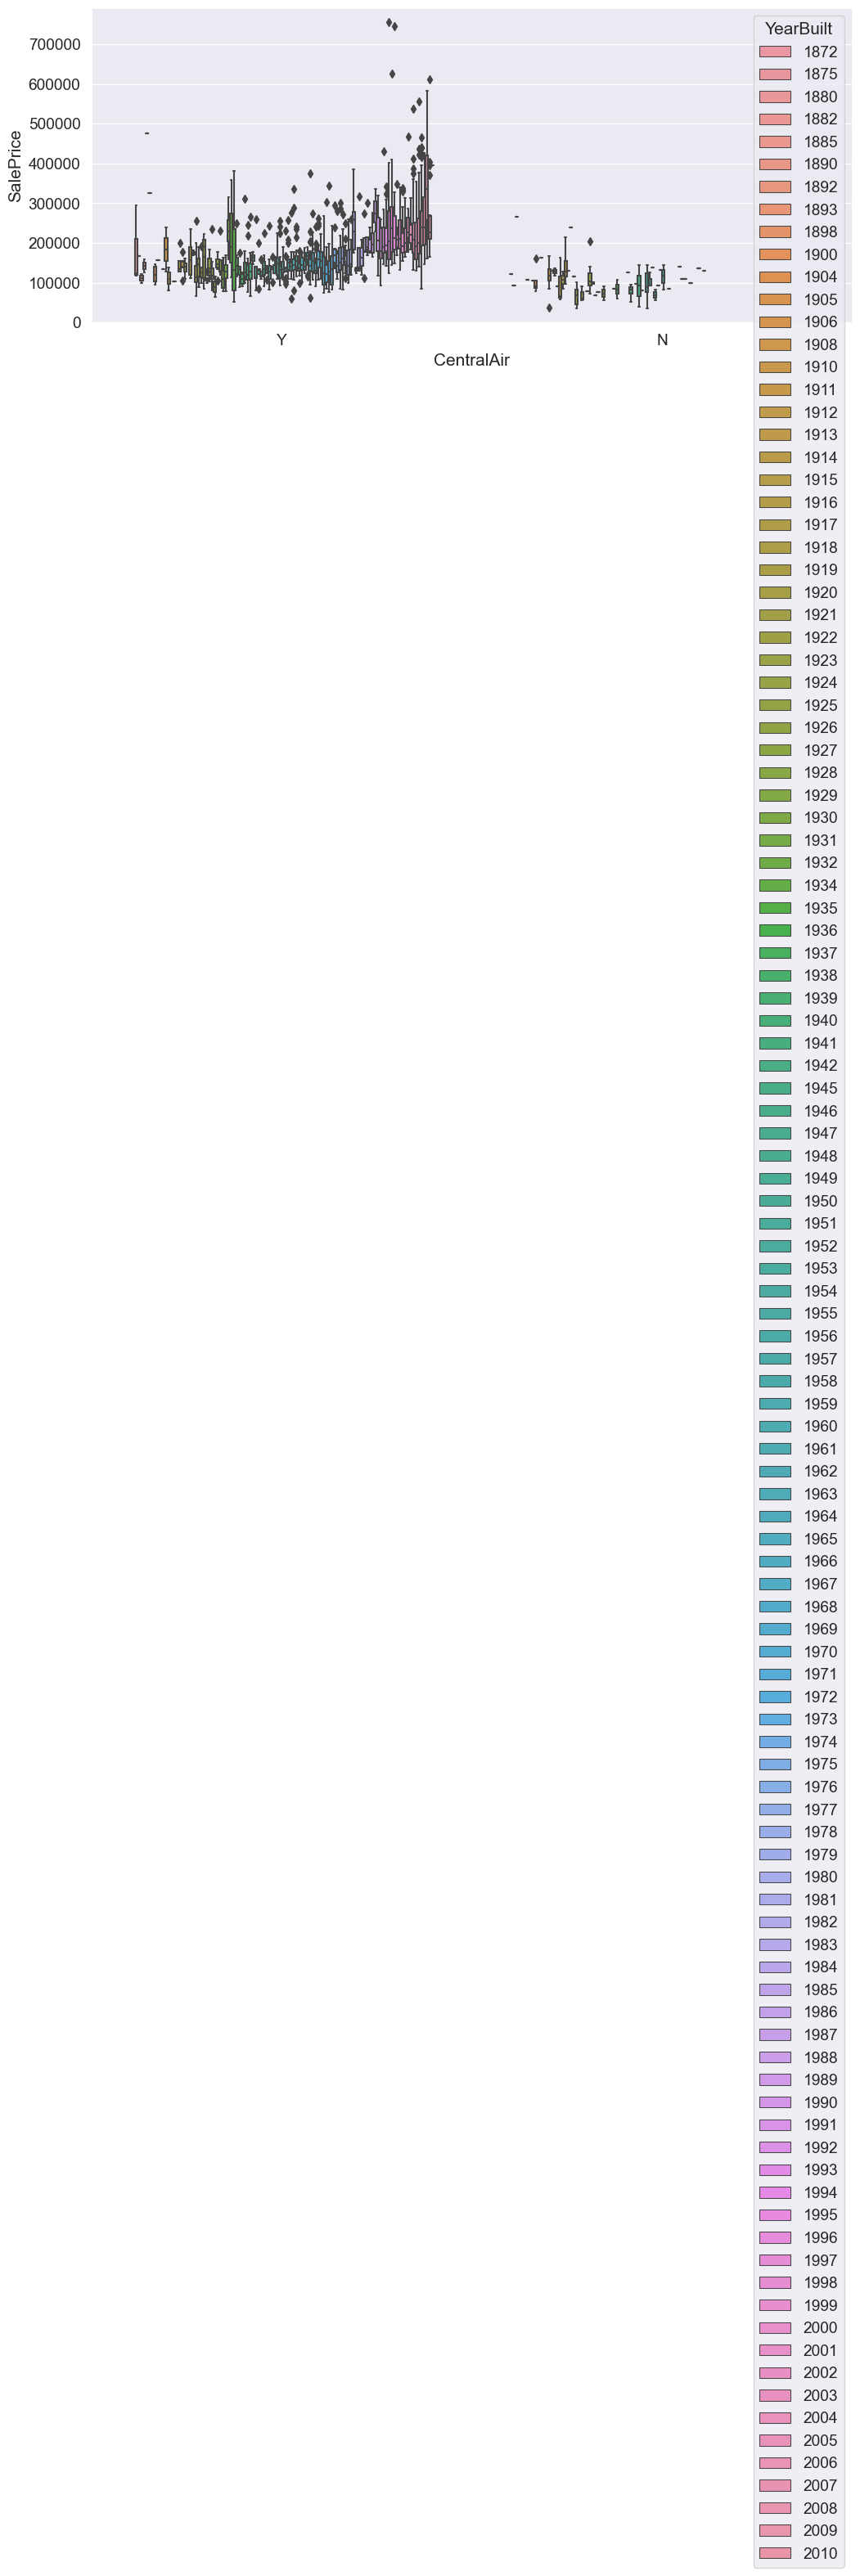

In [170]:
plt.figure(figsize=(12, 5))
sb.boxplot(x="CentralAir", y="SalePrice", hue="YearBuilt", data=df)
plt.show()

Мы также можем рассортировать по возрасту дома и кондиционированию
воздуха, чтобы исследовать, как тип здания зависит от обоих этих факторов
одновременно

In [171]:
df1 = df.groupby(["YearBuilt", "CentralAir"])["BldgType"]
df1 = df1.value_counts()
df1 = df1.unstack()
df1 = df1.apply(lambda x: x/x.sum(), axis=1)
print(df1.to_string(float_format="%.3f"))

BldgType              1Fam  2fmCon  Duplex  Twnhs  TwnhsE
YearBuilt CentralAir                                     
1872      N          1.000     NaN     NaN    NaN     NaN
1875      N          1.000     NaN     NaN    NaN     NaN
1880      N          1.000     NaN     NaN    NaN     NaN
          Y          1.000     NaN     NaN    NaN     NaN
1882      Y          1.000     NaN     NaN    NaN     NaN
1885      Y          0.500   0.500     NaN    NaN     NaN
1890      Y          1.000     NaN     NaN    NaN     NaN
1892      N          1.000     NaN     NaN    NaN     NaN
          Y          1.000     NaN     NaN    NaN     NaN
1893      Y          1.000     NaN     NaN    NaN     NaN
1898      N          1.000     NaN     NaN    NaN     NaN
1900      N          0.400   0.600     NaN    NaN     NaN
          Y          0.400   0.400   0.200    NaN     NaN
1904      Y          1.000     NaN     NaN    NaN     NaN
1905      N            NaN   1.000     NaN    NaN     NaN
1906      Y   

6.6. Отображения диаграмм

<AxesSubplot: xlabel='OverallQual', ylabel='SalePrice'>

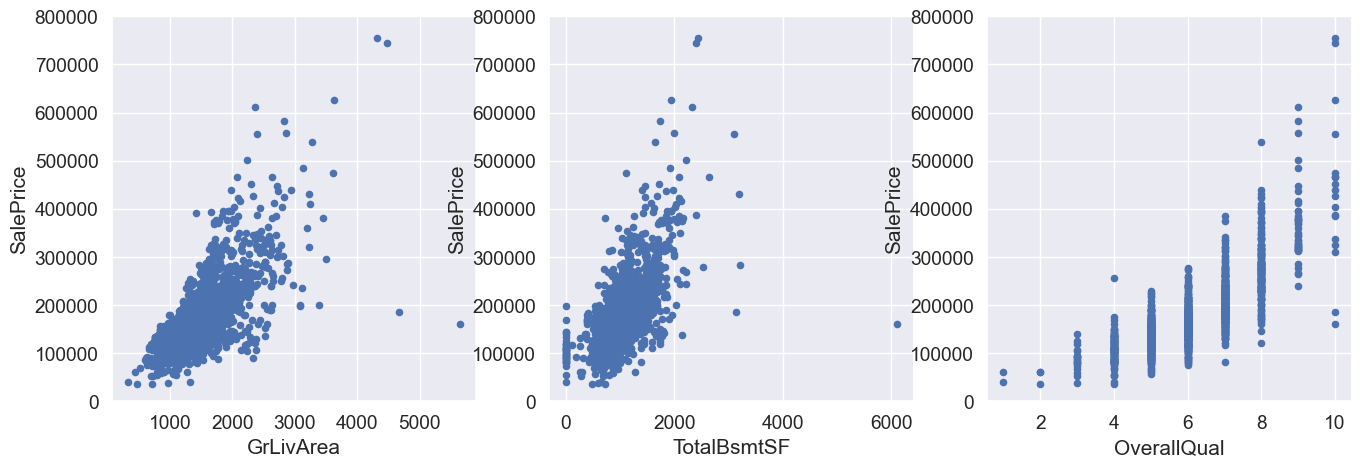

In [172]:
output,var,var1,var2 = 'SalePrice', 'GrLivArea', 'TotalBsmtSF', 'OverallQual'
fig, axes = plt.subplots(nrows=1,ncols=3,figsize=(16,5))
df.plot.scatter(x=var,y=output,ylim=(0,800000),ax=axes[0])
df.plot.scatter(x=var1,y=output,ylim=(0,800000),ax=axes[1])
df.plot.scatter(x=var2,y=output,ylim=(0,800000),ax=axes[2])

Между переменными наблюдается связь.

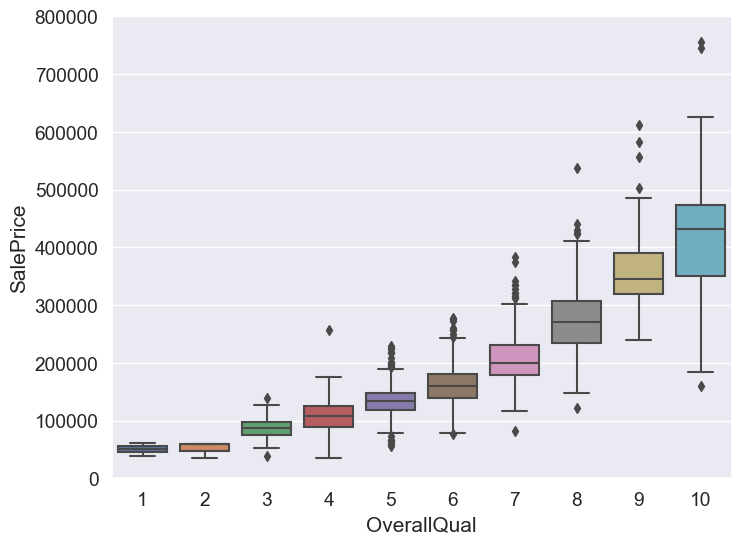

In [174]:
fig, ax = plt.subplots(figsize=(8,6))
sb.boxplot(x=var2,y=output,data=df)
ax.set_ylim(0,800000)
plt.show()

Между какими параметрами построен boxplot? Есть ли выбросы в данных?

Между ценой и качеством.
Выбросы есть.

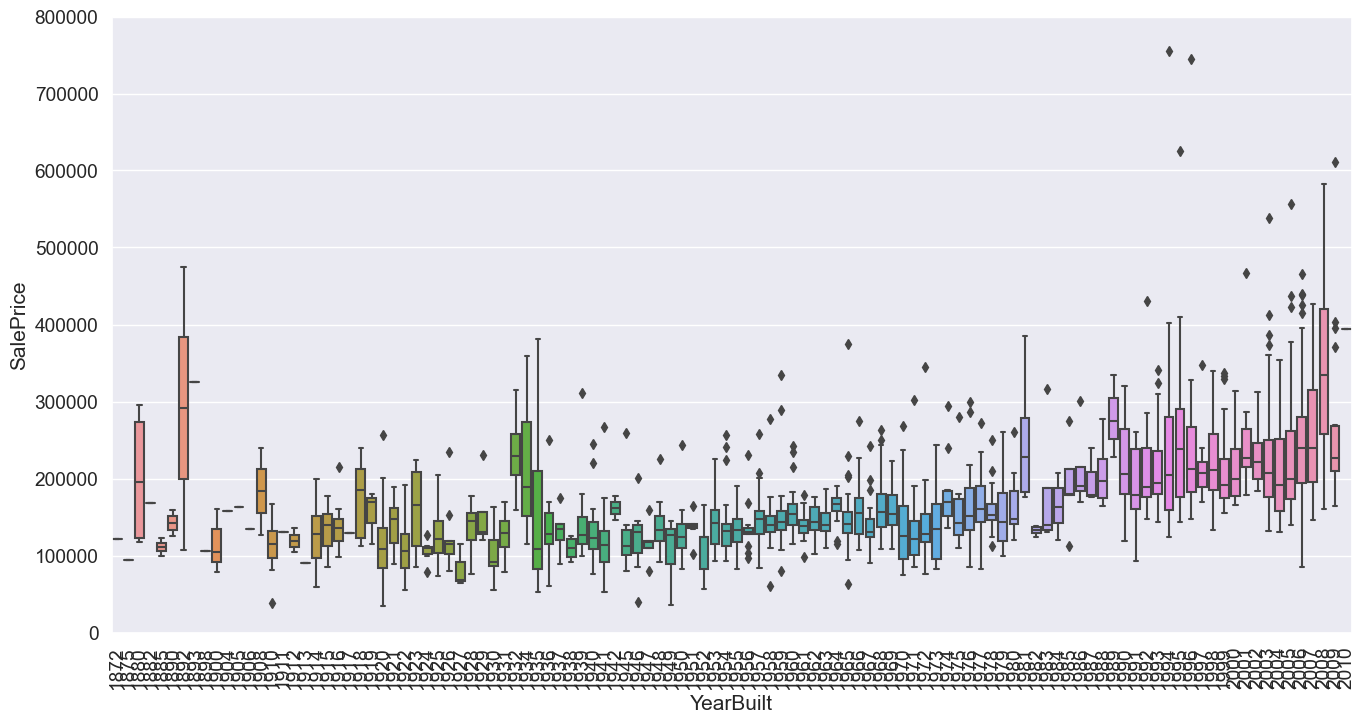

In [179]:
var3 = 'YearBuilt'
fig, ax = plt.subplots(figsize=(16,8))
sb.boxplot(x=var3,y=output,data=df)
ax.set_ylim(0,800000)
plt.xticks(rotation=90)
plt.show()


6.7. Отображение тепловой карты характеристической
ковариационной матрицы

C:\Users\artem\AppData\Local\Temp\ipykernel_14484\1331911584.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = df.corr()


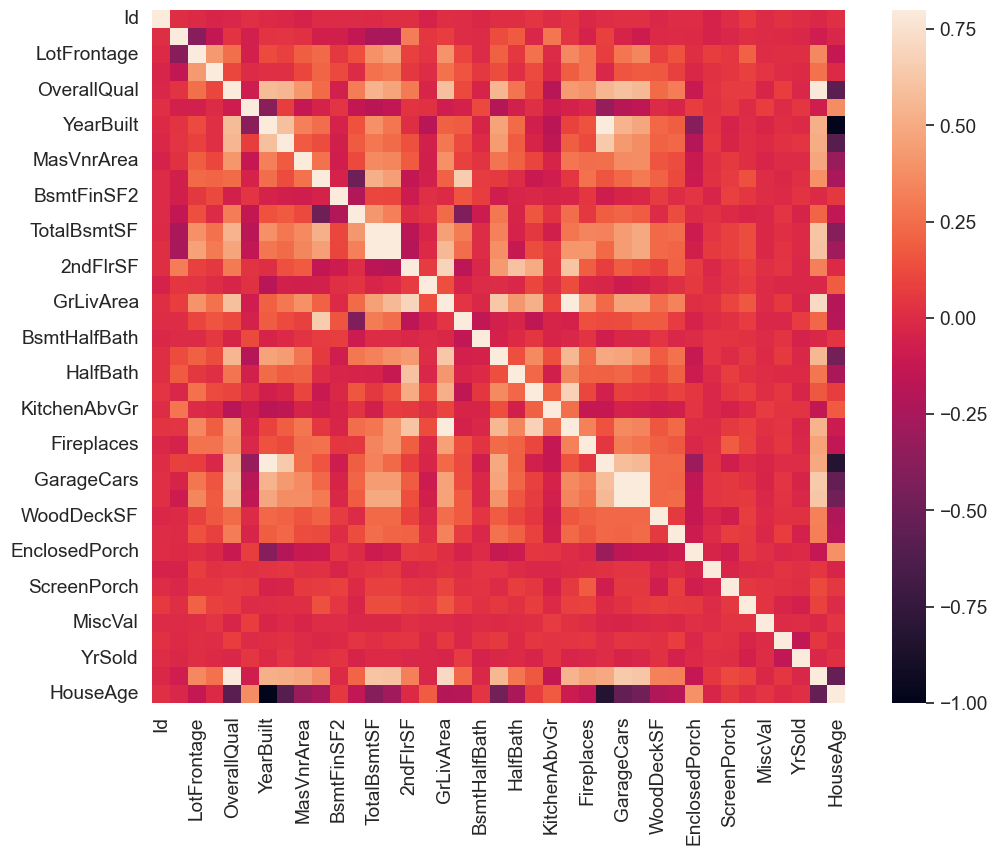

In [180]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sb.heatmap (corrmat, vmax = .8, square = True, ax = ax) 
#Параметр square гарантирует, что когда corrmat -
#неквадратная матрица, общий вывод графика по-прежнему будет
#квадратным
plt.show()


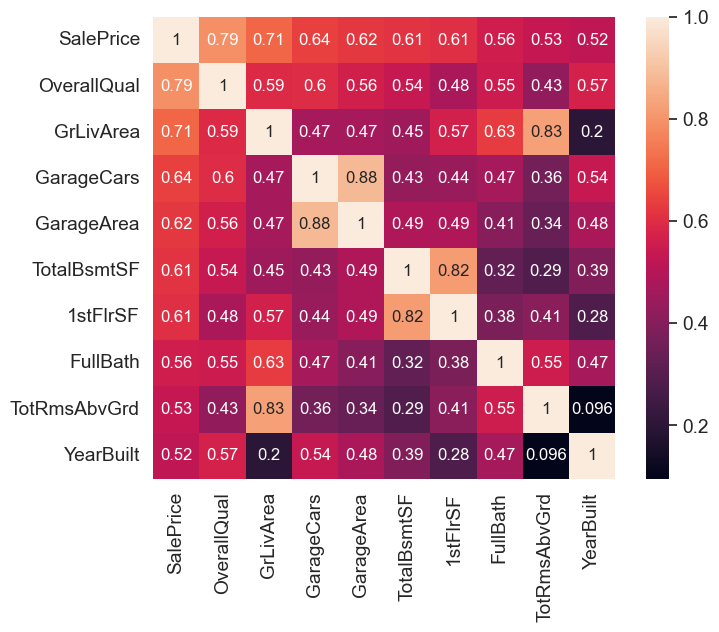

In [181]:
k = 10
top10_attr = corrmat.nlargest(k, output).index
top10_mat = corrmat.loc[top10_attr, top10_attr]
fig,ax = plt.subplots(figsize=(8,6))
sb.set(font_scale=1.25)
sb.heatmap(top10_mat, annot=True, annot_kws={'size':12}, square=True)
# Установите аннотацию для отображения чисел в маленьких ячейках и annot_kws для настройки числового формата
plt.show()

6.8. Графическая матрица, объединяющая точечные и столбчатые
диаграммы

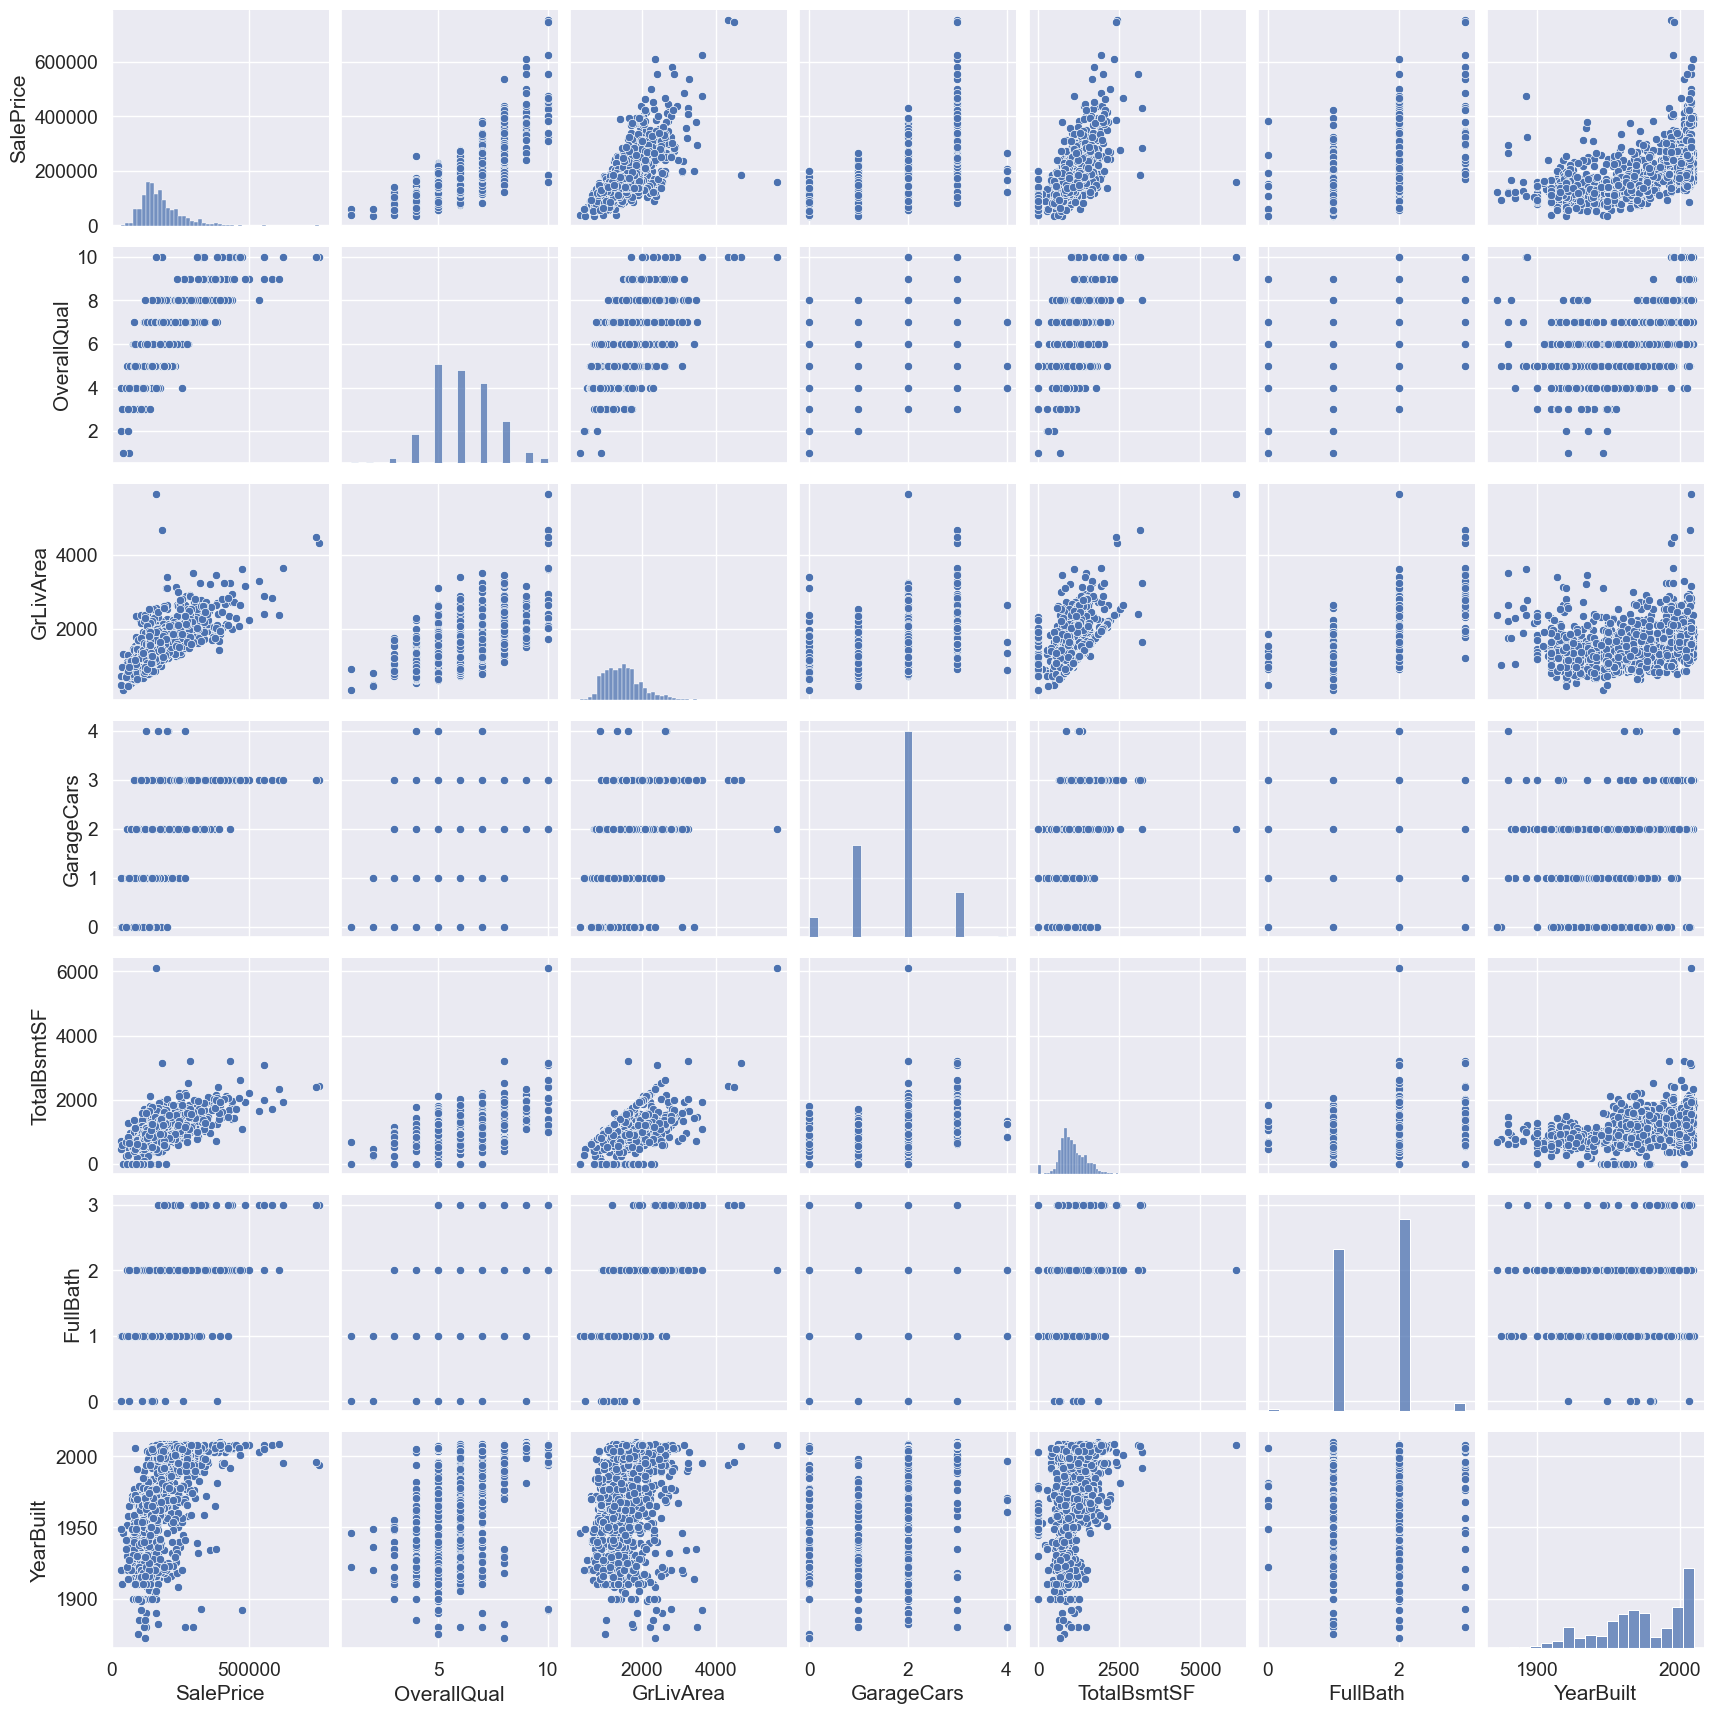

In [182]:
var_set = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sb.set (font_scale = 1.25) # Устанавливаем размер шрифта по горизонтальной и вертикальной оси
sb.pairplot (df[var_set]) # 7 * 7 графическая матрица
# Различные типы отображения могут быть установлены в параметрах kind и diag_kind, вот диаграммы разброса и гистограммы, и вы также можете установить разные типы отображения на каждом графике
plt.show()

## Задание 3

In [183]:
df = pd.read_csv('water.txt', sep='\t')
df.head()

,location,town,mortality,hardness
0,South,Bath,1247,105
1,North,Birkenhead,1668,17
2,South,Birmingham,1466,5
3,North,Blackburn,1800,14
4,North,Blackpool,1609,18


1. Используя метод .describe() вычислите описательные статистики для северных и
южных городов. Сравните средние значения смертности в северных 
и южных городах и значения концентрации кальция в питьевой воде.

In [184]:
df.loc[df.location == 'North'].describe()

,mortality,hardness
count,35.000000,35.000000
mean,1633.600000,30.400000
std,136.936911,26.134494
min,1378.000000,6.000000
25%,1557.500000,12.500000
50%,1637.000000,17.000000
75%,1718.000000,44.000000
max,1987.000000,94.000000


In [185]:
df.loc[df.location == 'South'].describe()

,mortality,hardness
count,26.000000,26.000000
mean,1376.807692,69.769231
std,140.269175,40.360682
min,1096.000000,5.000000
25%,1259.250000,40.250000
50%,1364.000000,75.500000
75%,1485.750000,99.750000
max,1627.000000,138.000000


2. Постройте 95% доверительные интервалы для средней годовой смертности по
всем южным и северным городам. Отличаются ли границы интервалов?

In [186]:
from statsmodels.stats.weightstats import _tconfint_generic

In [187]:
south = df.loc[df.location == 'South']
north = df.loc[df.location == 'North']
death_mean_s = south.mortality.mean()
death_mean_n = north.mortality.mean()
death_mean_std_s = south.mortality.std() / np.sqrt(south.mortality.shape[0])
death_mean_std_n = north.mortality.std() / np.sqrt(north.mortality.shape[0])
print("South 95%: ", _tconfint_generic(death_mean_s, death_mean_std_s, south.mortality.shape[0] - 1, 0.05, 'two-sided'))
print("North 95%: ", _tconfint_generic(death_mean_n, death_mean_std_n, north.mortality.shape[0] - 1, 0.05, 'two-sided'))

South 95%:  (1320.1517462936238, 1433.463638321761)
North 95%:  (1586.5605251961385, 1680.6394748038613)


Границы значительно отличаются

Постройте 95% доверительные интервалы для средней концентрации кальция в питьевой воде для южных и северных городов. Отличаются ли границы интервалов?

In [188]:
south = df.loc[df.location == 'South']
north = df.loc[df.location == 'North']
death_mean_s = south.hardness.mean()
death_mean_n = north.hardness.mean()
death_mean_std_s = south.hardness.std() / np.sqrt(south.hardness.shape[0])
death_mean_std_n = north.hardness.std() / np.sqrt(north.hardness.shape[0])
print("South 95%: ", _tconfint_generic(death_mean_s, death_mean_std_s, south.hardness.shape[0] - 1, 0.05, 'two-sided'))
print("North 95%: ", _tconfint_generic(death_mean_n, death_mean_std_n, north.hardness.shape[0] - 1, 0.05, 'two-sided'))

South 95%:  (53.467198692036106, 86.07126284642544)
North 95%:  (21.42248728572426, 39.37751271427574)


Границы значительно отличаются

## Задание 4

1. Используя ресурс kaggle (https://www.kaggle.com/), выберите один из наборов
данных. Загрузите этот набор и выведите первые 10 записей на экран. 

In [189]:
https://www.kaggle.com/datasets/sadiqshah/bike-sales-in-europe

#steam = pd.read_csv('steam_games.csv')
#steam.head(10)

#food = pd.read_csv('food.csv', sep=" ")
#food.head(30)

#moto = pd.read_csv('BIKE DETAILS.csv')
#moto.head(10)

SyntaxError: invalid syntax (1121802003.py, line 1)

In [ ]:
#food = pd.read_csv('food.csv', sep=" ")
#food.head(30)
#moto = pd.read_csv('BIKE DETAILS.csv')
#moto.head(10)

In [ ]:
bike = pd.read_csv('Bike_Sales.csv')
bike.head(10)

2. Опишите данные набора: какие признаки в нем присутствуют, что они означают,
какой у них тип данных, какие значения могут принимать.

In [ ]:
bike.info()

1., 2., 3., 4, ( Date, Day, Month, Year)  дата покупки

5) Customer_Age возраст покупателя

6) Age_Group Возрастная группа

7) Customer_Gender пол
8) State регион
9) Product_Category категория товара
10) Sub_Category подкатегория
11) Product Название товара
12) Order_Quantity  количество товаров в заказе
13) Unit_Cost себестоимость товара
14) Unit_Price цена продажи
15) Profit прибиль
16) Cost итоговая себестоимость
17) Revenue стоимость

3. Укажите какие признаки являются количественными, качественными порядковыми и качественными номинальными.

Колисественные: Customer_Age, Order_Quantity,
Unit_Cost, Unit_Price, Profit, Cost, Revenue .

Качественные номинальные:Age_Group, Customer_Gender, State, Product_Category, 
 Sub_Category, Product, 

4. Рассчитайте параметры описательной статистики для признаков набора. С помощью
параметров описательной статистики опишите один из количественных признаков и
один из категориальных признаков. Есть ли в количественном признаке выбросы?
Какое значение является выбросом и почему? По какому категориальному признаку
можно группировать данные? Какие группировки представляют интерес и почему?


In [ ]:
print("Характеристики возраста покупателя")
mean = np.mean(bike['Customer_Age'])
print("Среднее значение:", mean)

h_mean = len(x) / sum(1 / item for item in bike['Customer_Age'])
print("Гармоническое среднее:", h_mean)
g_mean = 1
for i in x:
    g_mean *= i
    g_mean **= 1 / len(bike['Customer_Age'])
print("Среднее геометрическое:", g_mean)


median = np.median(bike['Customer_Age'])
print("Медиана:", median)

M = statistics.mode(bike['Customer_Age'])
print("Мода:", M)

dis = np.var(bike['Customer_Age'], ddof=1)
print("Дисперсия:", dis)

std = np.std(bike['Customer_Age'], ddof=1)

print("Среднеквадратичное отклонение:", std)

print("Смещение:", bike['Customer_Age'].skew())

print("Диапазон:", np.ptp(bike['Customer_Age']))
result = bike['Customer_Age'].describe()
print("Статистика:", result, sep='\n')

Возможно, максимальное значение является выбросом.

5. Постройте графики для количественных и категориальных признаков. Какие
визуализации построены для количественных признаков? Какие особенности
распределения данных они позволяют наблюдать? Какие визуализации построены
для категориальных признаков? Какие особенности распределения данных они
позволяют наблюдать? Какие визуализации построены для пар признаков? Какие
особенности распределения данных они позволяют наблюдать?

In [ ]:
#ax = sb.histplot(x='Customer_Age', y='Revenue', data=bike)
#ax.ylim(0, 20000)
#ax.set(title='')
#ax.legend(x, hue)
#plt.show()

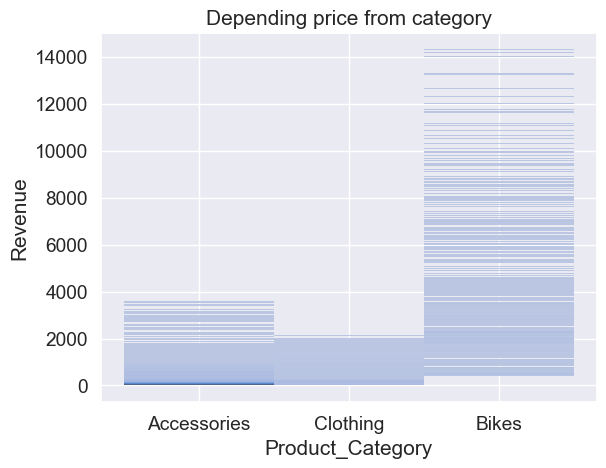

In [190]:
bax = sb.histplot(x='Product_Category', y='Revenue', data=bike[:100000], legend=False)
bax.set(title='Depending price from category')
plt.show()

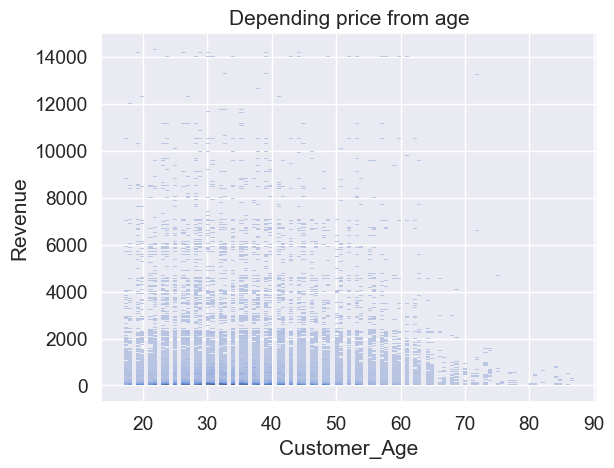

In [191]:
bax = sb.histplot(x='Customer_Age', y='Revenue', data=bike[:100000], legend=False)
bax.set(title='Depending price from age')
plt.show()

Проведите корреляционный анализ. Есть ли в вашем наборе данных коррелирующие
признаки?

C:\Users\artem\AppData\Local\Temp\ipykernel_14484\2014609399.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = bike.corr()


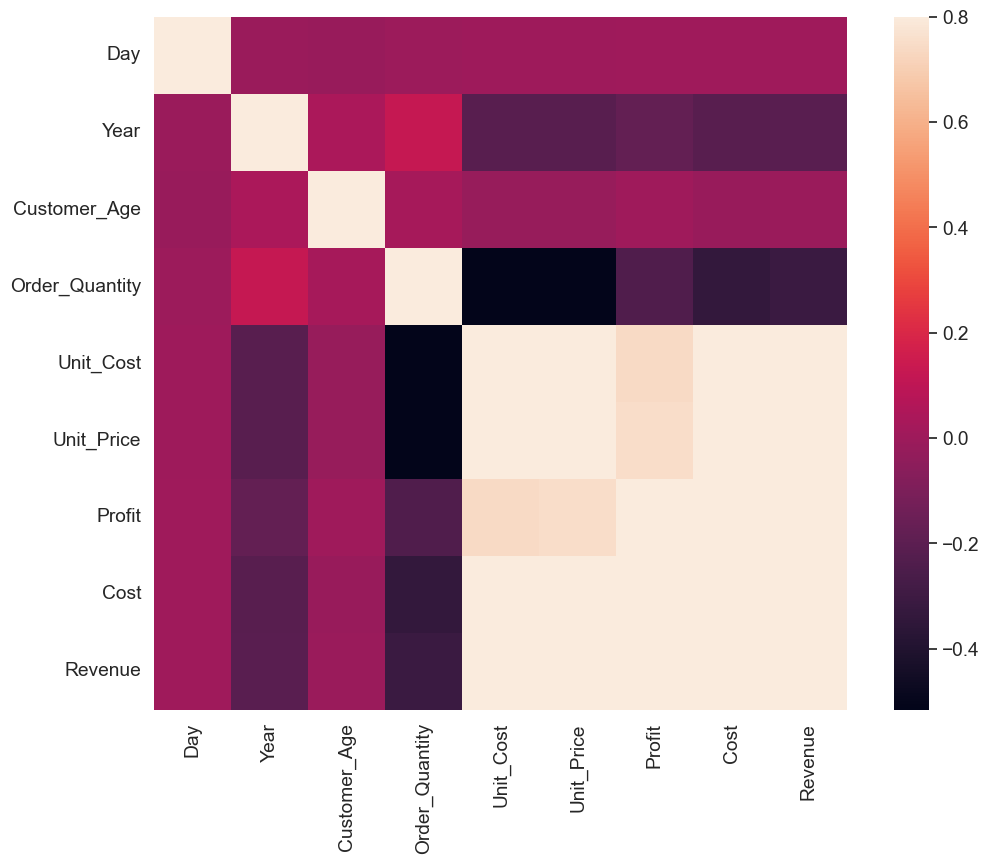

In [195]:
corrmat = bike.corr()
f, ax = plt.subplots(figsize=(12, 9))
sb.heatmap(corrmat, vmax = .8, square = True, ax = ax)
plt.show()

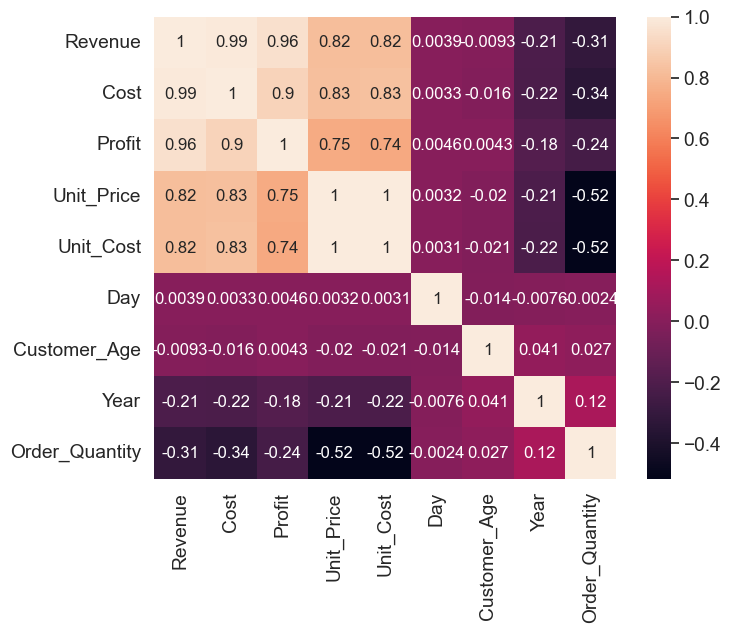

In [196]:
k = 10
output = 'Revenue'
top10_attr = corrmat.nlargest(k, output).index
top10_mat = corrmat.loc[top10_attr, top10_attr]
fig,ax = plt.subplots(figsize=(8,6))
sb.set(font_scale=1.25)
sb.heatmap(top10_mat, annot=True, annot_kws={'size':12}, square=True)
plt.show()